In [116]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_train.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [118]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id shape is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id shape is : {} ".format(df_test.shape))


The train data size after dropping Id shape is : (1460, 80) 
The test data size after dropping Id shape is : (1459, 79) 


In [119]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



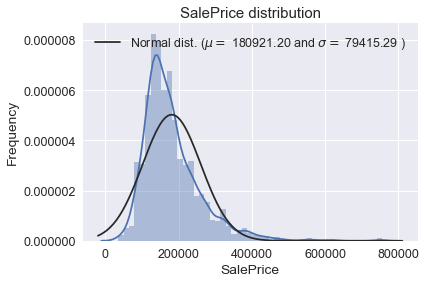

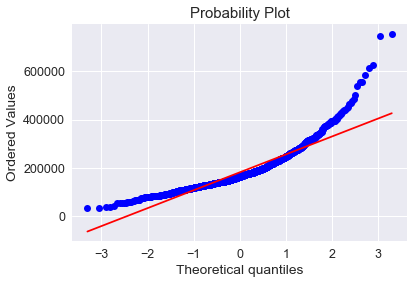

Skewness: 1.882876
Kurtosis: 6.536282


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

# Plot Histogram
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


 mu = 5.22 and sigma = 0.17



/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


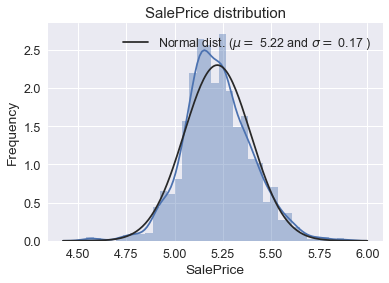

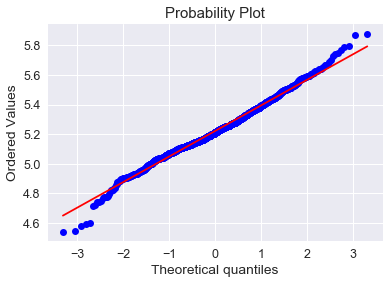

Skewness: 0.121335
Kurtosis: 0.809532


In [121]:
#log transform

import numpy as np

SalePrice_new = np.log10(df_train['SalePrice'])

sns.distplot(SalePrice_new, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(SalePrice_new)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(SalePrice_new, plot=plt)
plt.show()

print("Skewness: %f" % SalePrice_new.skew())
print("Kurtosis: %f" % SalePrice_new.kurt())


 mu = 7.84 and sigma = 0.16



/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


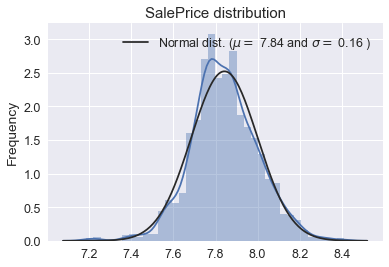

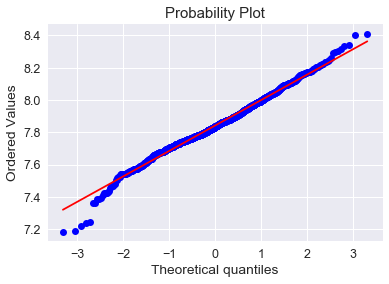

Skewness: -0.008644
Kurtosis: 0.870760


In [122]:
#box-cox transform
from scipy import stats

SalePrice_new = stats.boxcox(df_train['SalePrice'])[0]

sns.distplot(SalePrice_new, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(SalePrice_new)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(SalePrice_new, plot=plt)
plt.show()

print("Skewness: %f" % stats.skew(SalePrice_new))
print("Kurtosis: %f" % stats.kurtosis(SalePrice_new))

In [123]:
df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [124]:
df_train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [125]:
cat = len(df_train.select_dtypes(include=['object']).columns)
num = len(df_train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


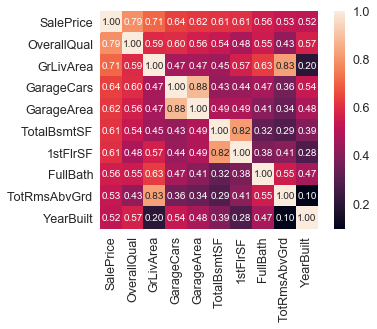

In [126]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [127]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


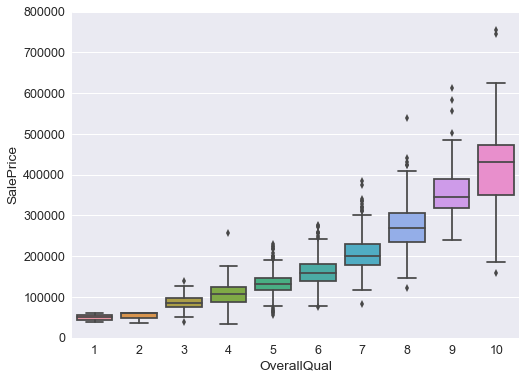

In [128]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


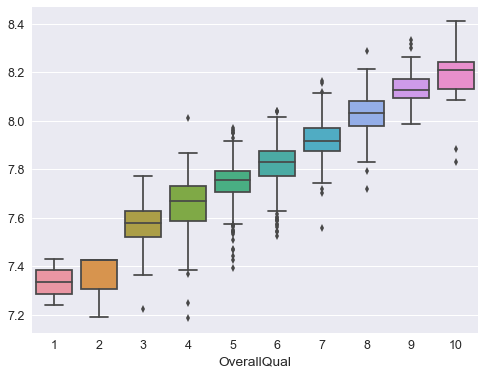

In [129]:
# Overall Quality vs Sale Price with box-cox transform
var = 'OverallQual'
SalePrice_new = pd.Series(SalePrice_new)

data = pd.concat([SalePrice_new, df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=SalePrice_new, data=data)

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


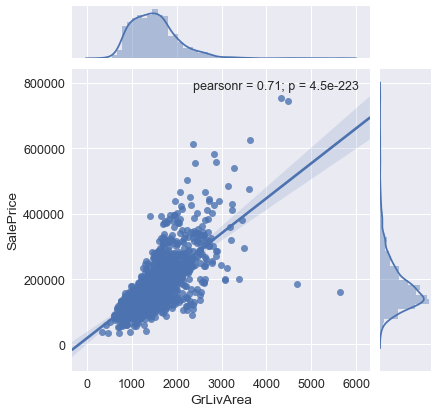

In [130]:
# Living Area vs Sale Price
sns.jointplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], kind='reg')

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


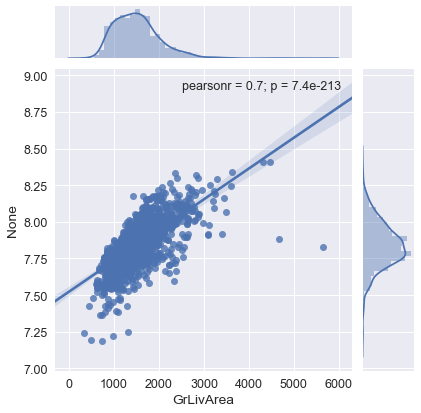

In [131]:
# Living Area vs Sale Price
sns.jointplot(x=df_train['GrLivArea'], y=SalePrice_new, kind='reg')

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


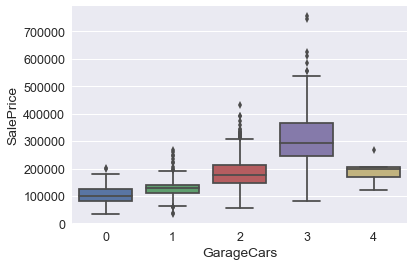

In [132]:
# Garage Area vs Sale Price
sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


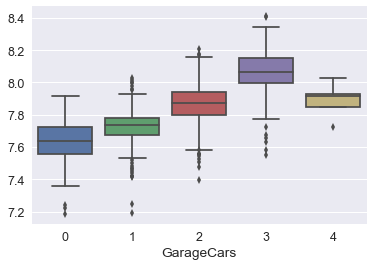

In [133]:
# Garage Area vs Sale Price
sns.boxplot(x=df_train['GarageCars'], y=SalePrice_new)

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


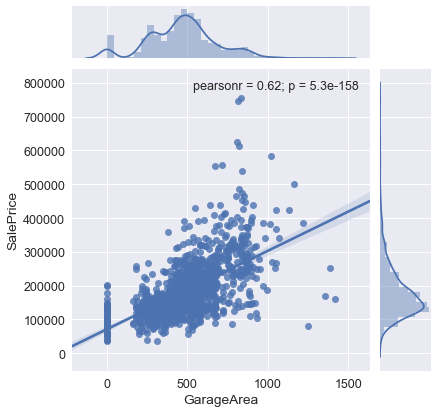

In [135]:
# Garage Area vs Sale Price
sns.jointplot(x=df_train['GarageArea'], y=df_train['SalePrice'], kind='reg')

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


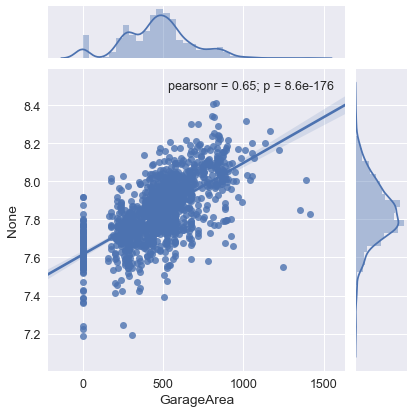

In [137]:
# Garage Area vs Sale Price
sns.jointplot(x=df_train['GarageArea'], y=SalePrice_new, kind='reg')

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


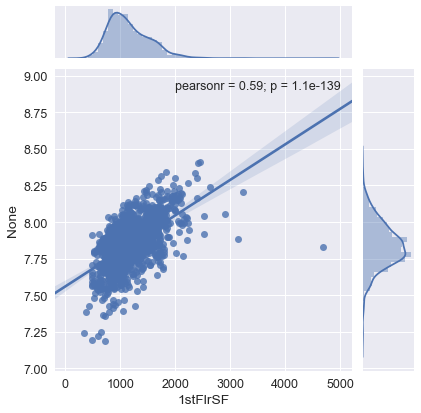

In [138]:
# First Floor Area vs Sale Price
sns.jointplot(x=df_train['1stFlrSF'], y=SalePrice_new, kind='reg')

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


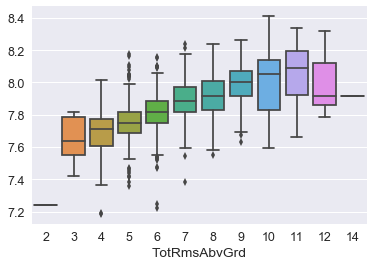

In [139]:
sns.boxplot(x=df_train['TotRmsAbvGrd'], y=SalePrice_new)

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


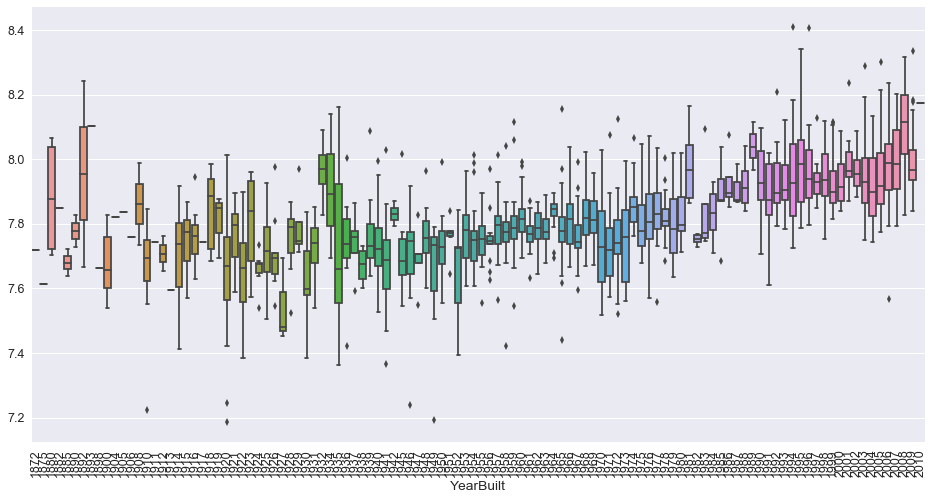

In [141]:
var = 'YearBuilt'
data = pd.concat([SalePrice_new, df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y=SalePrice_new, data=data)
plt.xticks(rotation=90);

In [142]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = SalePrice_new
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(df_train.shape))
print("Test data size is : {}".format(df_test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1460, 80)
Test data size is : (1459, 79)
Combined dataset size is : (2919, 79)


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [143]:
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


In [144]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [145]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [146]:
all_data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

ひとまず、数値型においてカラムを中央値で補間する

ただし、セグメントを高価、普通、低価格と分けて、それぞれの中央値とする

In [29]:
main_null_col = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
for i in main_null_col:
    X_train_main_int[i] = X_train_main_int[i] .fillna(X_train_main_int[i] .median())

low_null_col = ['LotFrontage', 'GarageYrBlt']
for i in low_null_col:
    X_train_low_int[i] = X_train_low_int[i] .fillna(X_train_low_int[i] .median())

exp_null_col = ['MasVnrArea', 'LotFrontage']
for i in exp_null_col:
    X_train_exp_int[i] = X_train_exp_int[i] .fillna(X_train_exp_int[i] .median())
    
print(X_train_main_int[main_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_low_int[low_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_exp_int[exp_null_col].isnull().sum())

MasVnrArea     0
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
MasVnrArea     0
LotFrontage    0
dtype: int64


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

これらのうち、価格と相関のあるもの上位５個を抽出する

In [30]:
main = pd.concat([X_train_main_int, y_train_main], axis=1)
low = pd.concat([X_train_low_int, y_train_low], axis=1)
exp = pd.concat([X_train_exp_int, y_train_exp], axis=1)

In [31]:
main_corr = main.corr()
low_corr = low.corr()
exp_corr = exp.corr()

print ('main part', main_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('low part', low_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('exp part', exp_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')

main part SalePrice      1.000000
OverallQual    0.591915
FullBath       0.530900
YearBuilt      0.478043
GarageCars     0.455655
GrLivArea      0.448509
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
low part SalePrice       1.000000
OverallQual     0.446431
OverallCond     0.334001
GrLivArea       0.306719
1stFlrSF        0.279864
TotRmsAbvGrd    0.236574
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
exp part SalePrice      1.000000
OverallQual    0.637371
GrLivArea      0.533678
TotalBsmtSF    0.516627
1stFlrSF       0.497750
GarageCars     0.466656
Name: SalePrice, dtype: float64 



In [32]:
main_null_col = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
for i in main_null_col:
    X_train_main_int[i] = X_train_main_int[i] .fillna(X_train_main_int[i] .median())

low_null_col = ['LotFrontage', 'GarageYrBlt']
for i in low_null_col:
    X_train_low_int[i] = X_train_low_int[i] .fillna(X_train_low_int[i] .median())

exp_null_col = ['MasVnrArea', 'LotFrontage']
for i in exp_null_col:
    X_train_exp_int[i] = X_train_exp_int[i] .fillna(X_train_exp_int[i] .median())
    
print(X_train_main_int[main_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_low_int[low_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_exp_int[exp_null_col].isnull().sum())

MasVnrArea     0
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
MasVnrArea     0
LotFrontage    0
dtype: int64


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

共通しているカラムでsubplotする

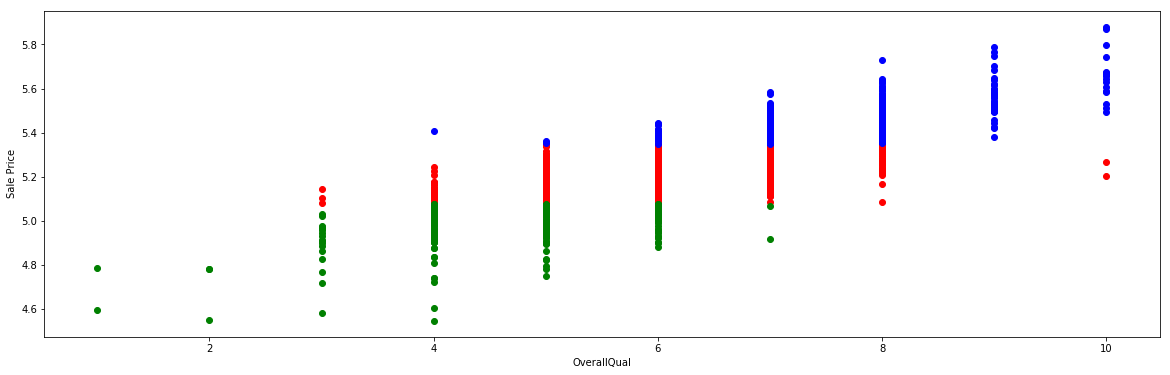

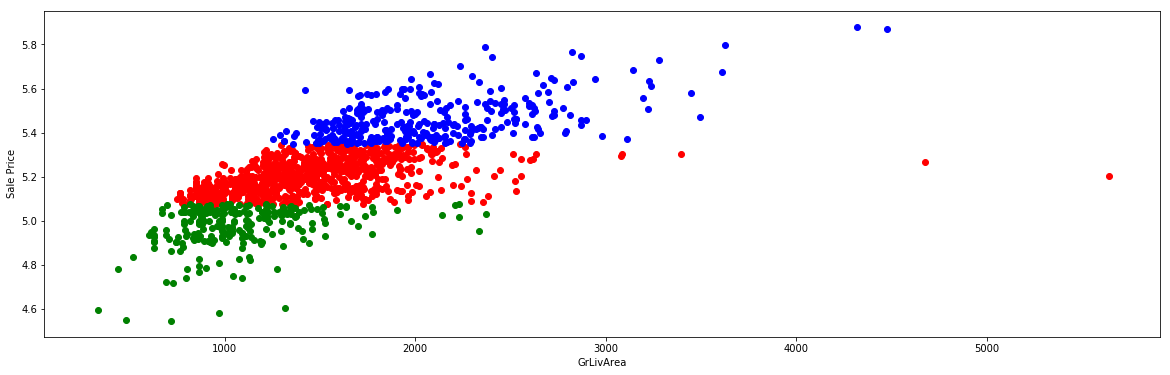

In [33]:
common_col = ['OverallQual', 'GrLivArea']
for i in common_col:
    plt.scatter(x=X_train_main_int[i], y=y_train_main,color='r')
    plt.scatter(x=X_train_low_int[i], y=y_train_low,color='g')
    plt.scatter(x=X_train_exp_int[i], y=y_train_exp,color='b')
    plt.ylabel('Sale Price')
    plt.xlabel(i)
    plt.show()

これらより、レイヤーがきちんと分かれているので、相関があるとみなせる

特徴的なカラムと値段を可視化する

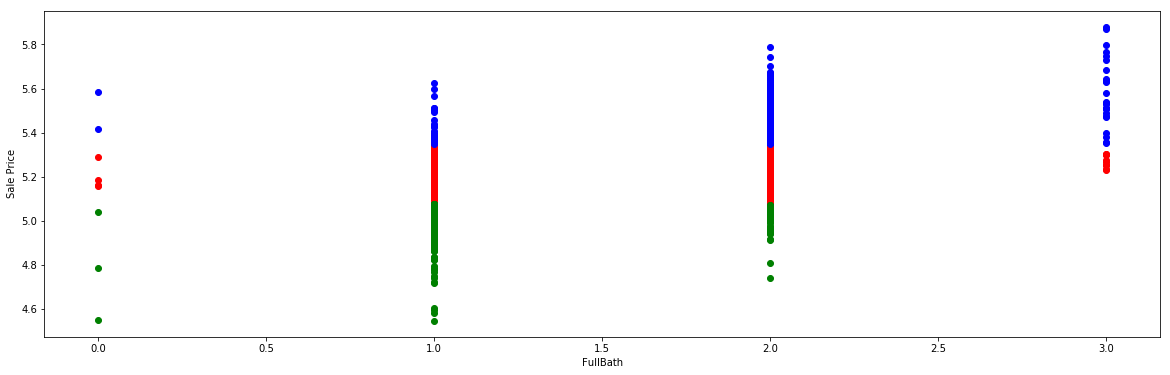

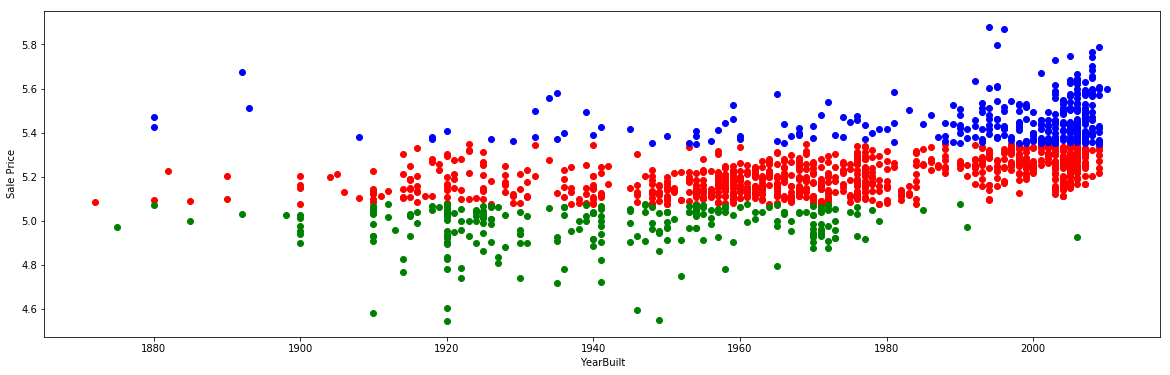

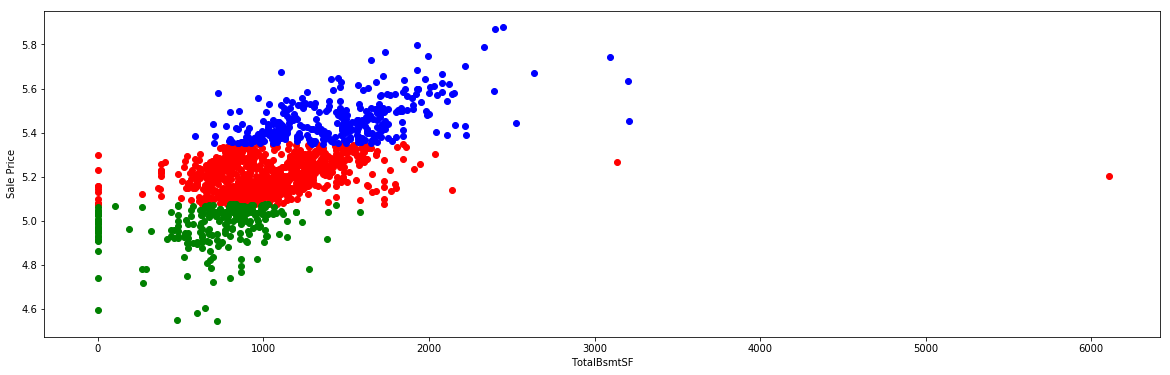

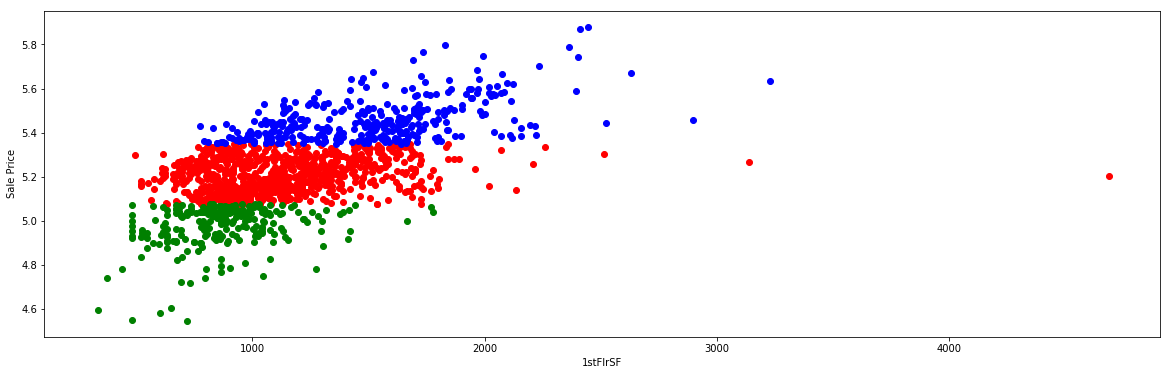

In [34]:
main_col = ['FullBath', 'YearBuilt']
low_col = [ '1stFlrSF', 'TotRmsAbvGrd']
exp_col = ['TotalBsmtSF', '1stFlrSF']

feature_col = ['FullBath', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', ]

for i in feature_col:
    plt.scatter(x=X_train_main_int[i], y=y_train_main,color='r')
    plt.scatter(x=X_train_low_int[i], y=y_train_low,color='g')
    plt.scatter(x=X_train_exp_int[i], y=y_train_exp,color='b')
    plt.ylabel('Sale Price')
    plt.xlabel(i)
    plt.show()

これらより上記のカラムYearbuiltをのぞいて、値が大きいほど値段が高く、低いほど値段が低いことが確認できる

次に、オブジェクト型を調べる

価格が高いものは、最頻値で補間する

In [35]:
null_columns = ['MasVnrType', 'BsmtFinType2']
for i in null_columns:
    X_train_exp_obj[i] = X_train_exp_obj [i].fillna(X_train_exp_obj[i].mode()[0])
X_train_exp_obj.isnull().any().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

価格が低い物件、価格が普通の物件の最頻値で補間する

In [36]:
for i in X_train_low_obj.columns.values:
    X_train_main_obj[i] =  X_train_main_obj[i].fillna(X_train_main_obj[i].mode()[0])
X_train_exp_obj.isnull().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [37]:
for i in X_train_low_obj.columns.values:
    X_train_low_obj[i] =  X_train_low_obj[i].fillna(X_train_low_obj[i].mode()[0])
X_train_low_obj.isnull().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

ダミー変数化させる

In [38]:
X_train_main_obj_new = pd.get_dummies(X_train_main_obj, dummy_na=True, columns=X_train_main_obj.columns.values)
X_train_exp_obj_new = pd.get_dummies(X_train_exp_obj, dummy_na=True, columns=X_train_exp_obj.columns.values)
X_train_low_obj_new = pd.get_dummies(X_train_low_obj, dummy_na=True, columns=X_train_low_obj.columns.values)

In [39]:
main = pd.concat([X_train_main_obj_new, y_train_main], axis=1)
low = pd.concat([X_train_low_obj_new, y_train_low], axis=1)
exp = pd.concat([X_train_exp_obj_new, y_train_exp], axis=1)

In [40]:
main_corr = main.corr()
low_corr = low.corr()
exp_corr = exp.corr()

print ('main part', main_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('low part', low_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('exp part', exp_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')

main part SalePrice              1.000000
ExterQual_Gd           0.482830
KitchenQual_Gd         0.469519
BsmtQual_Gd            0.462972
Foundation_PConc       0.439654
Exterior2nd_VinylSd    0.336313
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
low part SalePrice             1.000000
CentralAir_Y          0.409699
PavedDrive_Y          0.254611
Electrical_SBrkr      0.217800
Neighborhood_NAmes    0.211894
ExterQual_TA          0.207483
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
exp part SalePrice               1.000000
BsmtQual_Ex             0.556143
ExterQual_Ex            0.501309
KitchenQual_Ex          0.467514
RoofStyle_Hip           0.362250
Neighborhood_NridgHt    0.336110
Name: SalePrice, dtype: float64 



予測モデルを構築する

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train, X_test, y_test = train_test_split(X_train, y_train, test)